# [WEEK6 : PCA] 
### - 자료 따라해보기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Eigen Decomposition을 이용한 PCA

In [2]:
np.random.seed(516)
m=60
w1,w2 = 0.1, 0.3
noise = 0.1
angles = (np.random.rand(m) * 3 * np.pi / 2) -0.5
X = np.empty((m,3))
X[: , 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[: , 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[: , 2] = X[: , 0] * w1 + X[: , 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

### (1) PCA를 위해 공분산 행렬을 구하기

In [3]:
X_cen = X - X.mean(axis=0) #scale
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix
print(X_cov)

[[0.71852462 0.14168068 0.13509491]
 [0.14168068 0.14394757 0.06323302]
 [0.13509491 0.06323302 0.04666545]]


### (2) 공분산행렬 X_cov에 대해 eigenvalue & eigenvector 구하기

In [4]:
w, v = np.linalg.eig(X_cov)

print('Eigenvalue : ', w)
print('Eigenvector : ', v)

Eigenvalue :  [0.78062994 0.11984569 0.00866201]
Eigenvector :  [[ 0.95302321  0.28005522 -0.11539427]
 [ 0.23147812 -0.91910022 -0.31886152]
 [ 0.19535774 -0.27717118  0.94075049]]


### (3) 데이터에 대한 eigenvector의 설명력 확인하기

In [5]:
print('Explained Variance Ratio : ', w/w.sum())

Explained Variance Ratio :  [0.8586488  0.13182348 0.00952772]


## 2. SVD를 이용한 PCA

In [6]:
np.random.seed(516)
m=60
w1,w2 = 0.1, 0.3
noise = 0.1
angles = (np.random.rand(m) * 3 * np.pi / 2) -0.5
X = np.empty((m,3))
X[: , 0] = np.cos(angles) + np.sin(angles) / 2 + noise * np.random.randn(m) / 2
X[: , 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[: , 2] = X[: , 0] * w1 + X[: , 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

### (1) 데이터셋 X를 스케일링하기

In [7]:
X_cen = X - X.mean(axis=0)

print(X[0:5])
print(X_cen[0:5])

[[-1.12744649 -0.13409088 -0.08291197]
 [-0.81774502  0.24277363 -0.13030901]
 [ 1.05830467  0.00621877  0.27269774]
 [-0.16788217  0.69258945  0.30592024]
 [-1.0715175  -0.15149159 -0.24170076]]
[[-1.12891259 -0.38859439 -0.14575596]
 [-0.81921112 -0.01172989 -0.193153  ]
 [ 1.05683857 -0.24828474  0.20985375]
 [-0.16934827  0.43808594  0.24307625]
 [-1.0729836  -0.4059951  -0.30454476]]


### (2) X_cen에 대해 singular value&singular vector 구하기

In [8]:
U, D, V_t = np.linalg.svd(X_cen)

print('singular value : ', D)
print("singular vector :\n", V_t.T)

singular value :  [6.78654305 2.65911555 0.71488352]
singular vector :
 [[ 0.95302321 -0.28005522  0.11539427]
 [ 0.23147812  0.91910022  0.31886152]
 [ 0.19535774  0.27717118 -0.94075049]]


### (3) 설명력 확인하기

In [9]:
print("Explained Variance Ratio : ", D**2 / np.sum(D**2))

Explained Variance Ratio :  [0.8586488  0.13182348 0.00952772]


### **비교해보기**

In [10]:
print(w/w.sum())
print(D**2 / np.sum(D**2))

[0.8586488  0.13182348 0.00952772]
[0.8586488  0.13182348 0.00952772]



# LAB :: PCA & FA

In [11]:
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
df.shape

(150, 5)

In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 1. PCA

### (1) Scaling 하기

In [14]:
features = list(df.columns[:-1])
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X)
pd.DataFrame(data = X, columns = features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### (2) 공분산 행렬 & 공분산 행렬의 eigenvalue, eigenvector 구하기

In [15]:
cov_matrix = np.cov(X.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [16]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print("Eigenvalue : ", eig_vals)
print("Eigenvector : \n", eig_vecs)

Eigenvalue :  [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvector : 
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Eigenvector 순서대로 PC1, PC2, PC3, PC4

### (3) PCA & 시각화

In [17]:
pca = PCA(n_components =2) #2차원으로 차원축소(PC1, PC2사용)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(data=X_pca, columns = ["PC1", "PC2"])
finalDf = pd.concat([df_pca, df[["target"]]], axis = 1)

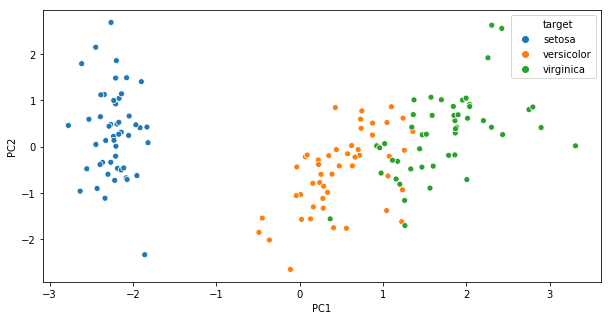

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df_pca["PC1"], y = df_pca["PC2"], hue = finalDf["target"])

In [19]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

각각 PC1, PC2의 설명력

## 2. FA
### (1) scikit-learn의 FactorAnalysis

In [20]:
X = df.loc[:, features].values
fa = FactorAnalysis(n_components = 10)
X_fa = fa.fit_transform(X)

df_fa = pd.DataFrame(data = X_fa, columns = ["F1", "F2", "F3", "F4"])
df_fa.head()

,F1,F2,F3,F4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


F1, F2만 유의하다!

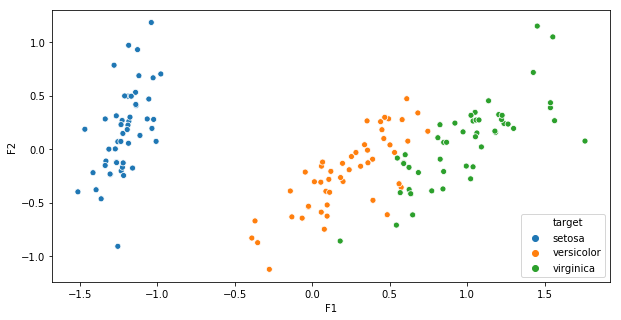

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df_fa["F1"], y = df_fa["F2"], hue = df["target"])

### (2) factor_analyzer의 FactorAnalyzer

In [22]:
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [23]:
fpath = './bfi.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [24]:
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [25]:
df = df.dropna()

In [26]:
fa = FactorAnalyzer(n_factors = 6, rotation = "varimax")

In [27]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
        method='minres', n_factors=6, rotation='varimax',
        rotation_kwargs={}, use_smc=True)

In [28]:
ev, v = fa.get_eigenvalues()

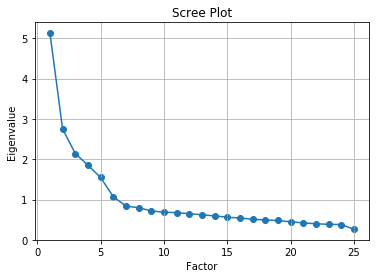

In [29]:
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## [WEEK6 HW]

In [30]:
wine = pd.read_csv("Wine.csv", header = None)
wine.columns=["class","alc","malic","ash","alc_of_ash","mag","to_phe","fla","nonfla","pro", "col", "hue", "dilu", "proline"]
wine.head()

,class,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [31]:
wine.isnull().sum()

class         0
alc           0
malic         0
ash           0
alc_of_ash    0
mag           0
to_phe        0
fla           0
nonfla        0
pro           0
col           0
hue           0
dilu          0
proline       0
dtype: int64

In [32]:
wine.shape

(178, 14)

In [33]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wine.iloc[:, 1:], wine.iloc[:, 0],
                                                    test_size=0.3, random_state= 521)

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(124, 13)
(124,)
(54, 13)
(54,)


In [35]:
x_train.head()

,alc,malic,ash,alc_of_ash,mag,to_phe,fla,nonfla,pro,col,hue,dilu,proline
20,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
117,12.42,1.61,2.19,22.5,108,2.00,2.09,0.34,1.61,2.06,1.06,2.96,345
26,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845


In [36]:
from sklearn.preprocessing import StandardScaler

x_train_st = StandardScaler().fit_transform(x_train.astype("float64")) 
x_test_st = StandardScaler().fit_transform(x_test.astype("float64"))

In [37]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

## PCA

In [38]:
from sklearn.decomposition import PCA

In [39]:
eigenVal, eigenVec = np.linalg.eig(np.cov(x_train_st.T))
print("Eigenvalues : \n", eigenVal)

Eigenvalues : 
 [4.69675916 2.43227667 1.58751785 0.96725435 0.87873759 0.6667242
 0.52170394 0.33667954 0.31665971 0.1110724  0.17464296 0.21353135
 0.20213133]


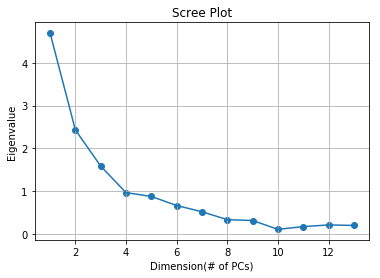

In [40]:
train_x = range(1, x_train_st.shape[1]+1)

plt.scatter(train_x, eigenVal)
plt.plot(train_x, eigenVal)
plt.title('Scree Plot')
plt.xlabel('Dimension(# of PCs)')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

PC 개수는 4개면 적당할 것 같다

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(x_train_st)

df_pca = pd.DataFrame(data = x_pca, columns = ["PC1", "PC2", "PC3", "PC4"])
final_pca = pd.concat([df_pca, y_train], axis = 1)
final_pca.head()

,PC1,PC2,PC3,PC4,class
0,3.343610,-0.854491,-0.340610,-0.272270,1
1,0.118774,1.958941,0.831616,-0.301542,2
2,1.995771,-0.565913,-0.267959,-0.119736,1
3,-1.950930,-2.033199,0.968645,-0.342995,3
4,2.292495,-1.118360,-0.229100,0.191506,1


PC1 & PC2 간, PC3 & PC4 간 biplot을 그려보자!

In [43]:
def pca_biplot(score, coeff, target, x, y, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=target)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(x))
    plt.ylabel("PC{}".format(y))
    plt.grid()

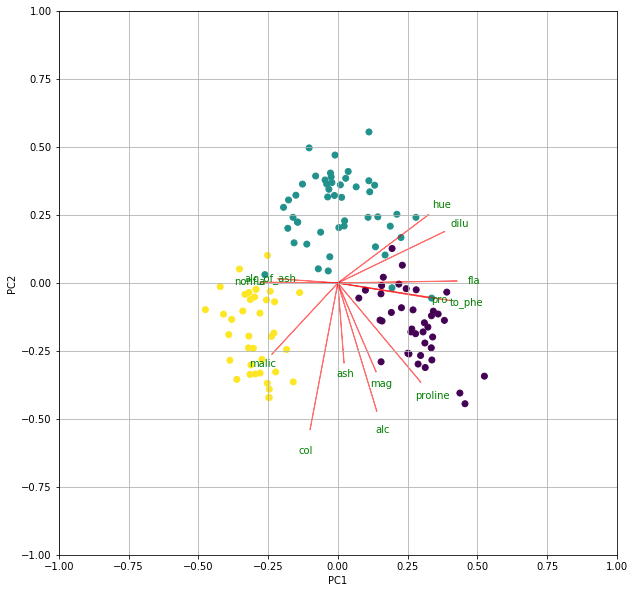

In [44]:
plt.figure(figsize=(10,10))

pca_biplot(x_pca[:,0:2], pca.components_[0:2, :].T,
       y_train.reset_index(drop=True), 1, 2, x_train.columns)

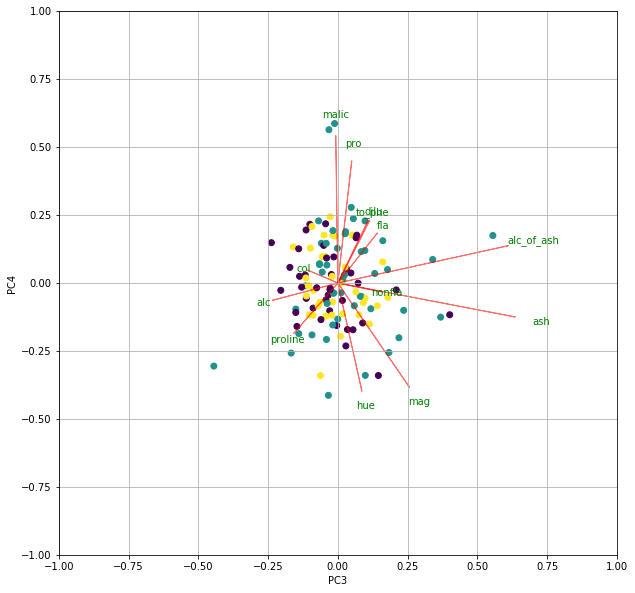

In [45]:
plt.figure(figsize=(10,10))

pca_biplot(x_pca[:,2:4], pca.components_[2:4, :].T,
       y_train.reset_index(drop=True), 3, 4, x_train.columns)

확실히 PC1 & PC2가 PC3 & PC4 보다는 분류를 잘한다는 것도 알 수 있다.

In [46]:
pca.explained_variance_ratio_

array([0.35837554, 0.18558935, 0.12113195, 0.07380415])

각 PC의 설명력이당

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
pca_model = LogisticRegression()
pca_model.fit(x_pca, y_train)

C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
pca = PCA(n_components = 4)
pca_fit = pca.fit(x_train_st)
x_pca_test = pca_fit.transform(x_test_st)

In [50]:
print("PCA Train Score : ", pca_model.score(x_pca, y_train))
print("PCA Test Score : ", pca_model.score(x_pca_test, y_test))

PCA Train Score :  0.967741935483871
PCA Test Score :  0.9259259259259259


## FA

In [51]:
from factor_analyzer import FactorAnalyzer

In [52]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')

In [53]:
fa_fit = fa.fit(x_train_st)
x_fa_train = fa_fit.transform(x_train_st)
x_fa_test = fa_fit.transform(x_test_st)

In [54]:
fa_model = LogisticRegression()
fa_model.fit(x_fa_train, y_train)

C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
print("FA Train Score : ", fa_model.score(x_fa_train, y_train))
print("FA Test Score : ", fa_model.score(x_fa_test, y_test))

FA Train Score :  0.9758064516129032
FA Test Score :  1.0


## Logistic Regression

In [56]:
logi_model = LogisticRegression()
logi_model.fit(x_train_st, y_train)

C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MINJU\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
print("Logistic Regression Train Score : ", logi_model.score(x_train_st, y_train))
print("Logistic Regression Test Score : ", logi_model.score(x_test_st, y_test))

Logistic Regression Train Score :  1.0
Logistic Regression Test Score :  0.9629629629629629


## Comparison

### Train Score

In [58]:
print("PCA Train Score : ", pca_model.score(x_pca, y_train))
print("FA Train Score : ", fa_model.score(x_fa_train, y_train))
print("Logistic Regression Train Score : ", logi_model.score(x_train_st, y_train))

PCA Train Score :  0.967741935483871
FA Train Score :  0.9758064516129032
Logistic Regression Train Score :  1.0


### Test Score

In [59]:
print("PCA Test Score : ", pca_model.score(x_pca_test, y_test))
print("FA Test Score : ", fa_model.score(x_fa_test, y_test))
print("Logistic Regression Test Score : ", logi_model.score(x_test_st, y_test))

PCA Test Score :  0.9259259259259259
FA Test Score :  1.0
Logistic Regression Test Score :  0.9629629629629629


- Train Score : Logistic Regression이 제일 높다.
- Test Score : FA가 제일 높다.